In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family = 'Malgun Gothic')

In [5]:
df = pd.read_csv('movies.csv', header=0)
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


## 데이터 정제 : 장르에 오타가 많아서 수정이 필요함

In [90]:
df['Genre'].unique()

array(['Romance', 'Comedy', 'Drama', 'Animation', 'Fantasy', 'Romence',
       'Comdy', 'Action', 'romance', 'comedy'], dtype=object)

In [91]:
df['Genre'].replace(['Comdy', 'comedy', 'Romence', 'romance'], 
                    ['Comedy', 'Comedy', 'Romance', 'Romance'], inplace=True)

In [93]:
df['Genre'].unique()

array(['Romance', 'Comedy', 'Drama', 'Animation', 'Fantasy', 'Action'],
      dtype=object)

In [94]:
df.isna().sum()  # 누락 체크

Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
money                0
dtype: int64

In [95]:
df.shape

(77, 9)

In [96]:
df.dtypes  # 데이터 타입 체크 : 혹시 숫자가 문자로 저장되어 있을 수 있으므로

Film                  object
Genre                 object
Lead Studio           object
Audience score %       int64
Profitability        float64
Rotten Tomatoes %      int64
Worldwide Gross      float64
Year                   int64
money                float64
dtype: object

In [97]:
# 월드 수익이 $ 때문에 문자로 잡혀있습니다
# $ 문자를 제거한 후에 숫자로 변환해줍니다.
data = []
for v in df['Worldwide Gross'].values:
    data.append(float(v[1:]))  # 첫글자 뺴고 실수로 변환후 저장
df['Worldwide Gross'] = data

IndexError: invalid index to scalar variable.

In [98]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,money
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,41.94,2008,5.908540
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,19.62,2010,2.764081
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,26.66,2010,3.755882
3,When in Rome,Comedy,Disney,44,0.000000,15,43.04,2010,6.063509
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,219.37,2008,30.905018


In [99]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,money
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,145.217532,2009.077922,20.458360
std,13.657113,8.031990,26.095001,164.040155,1.354974,23.110106
min,35.000000,0.000000,3.000000,0.030000,2007.000000,0.004226
25%,52.000000,1.751351,26.000000,32.590000,2008.000000,4.591305
50%,64.000000,2.642353,45.000000,79.180000,2009.000000,11.154941
75%,76.000000,5.103117,64.000000,205.300000,2010.000000,28.922826
max,89.000000,66.934000,96.000000,709.820000,2011.000000,100.000000


## 평점이 가장 높은 영화 10선을 선별해보세요 (평점으로 정렬, head(10))

In [100]:
df.sort_values(by='Audience score %', ascending=False).head(10)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,money
74,A Dangerous Method,Drama,Independent,89,0.448645,79,8.97,2011,1.263701
6,WALL-E,Animation,Disney,89,2.896019,96,521.28,2008,73.438336
22,Tangled,Animation,Disney,88,1.365692,89,355.01,2010,50.014088
39,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,8.26,2011,1.163675
72,Across the Universe,Romance,Independent,84,0.652603,54,29.37,2007,4.137669
43,Midnight in Paris,Romance,Sony,84,8.744706,93,148.66,2011,20.943338
54,Knocked Up,Comedy,Universal,83,6.636402,91,219.00,2007,30.852892
12,Twilight,Romance,Summit,82,10.180027,49,376.66,2008,53.064157
31,P.S. I Love You,Romance,Independent,82,5.103117,21,153.09,2007,21.567440
76,(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.72,2009,8.554281


In [101]:
df.sort_values(by='Rotten Tomatoes %', ascending=False).head(10)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,money
6,WALL-E,Animation,Disney,89,2.896019,96,521.28,2008,73.438336
43,Midnight in Paris,Romance,Sony,84,8.744706,93,148.66,2011,20.943338
69,Enchanted,Comedy,Disney,80,4.005737,93,340.49,2007,47.968499
54,Knocked Up,Comedy,Universal,83,6.636402,91,219.00,2007,30.852892
22,Tangled,Animation,Disney,88,1.365692,89,355.01,2010,50.014088
7,Waitress,Romance,Independent,67,11.089741,89,22.18,2007,3.124736
73,A Serious Man,Drama,Universal,64,4.382857,89,30.68,2009,4.322223
76,(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.72,2009,8.554281
57,Jane Eyre,Romance,Universal,77,0.000000,85,30.15,2011,4.247556
29,Rachel Getting Married,Drama,Independent,61,1.384167,85,16.61,2008,2.340030


## 돈을 가장 많이 번 영화 10선, 망한 영화 10선

In [102]:
df.sort_values(by='Worldwide Gross', ascending=False).head(10)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,money
14,The Twilight Saga: New Moon,Drama,Summit,78,14.196400,27,709.82,2009,100.000000
11,Twilight: Breaking Dawn,Romance,Independent,68,6.383364,26,702.17,2011,98.922262
45,Mamma Mia!,Comedy,Universal,76,9.234454,53,609.47,2008,85.862613
46,Mamma Mia!,Comedy,Universal,76,9.234454,53,609.47,2008,85.862613
6,WALL-E,Animation,Disney,89,2.896019,96,521.28,2008,73.438336
27,Sex and the City,Comedy,Warner Bros.,81,7.221796,49,415.25,2008,58.500747
12,Twilight,Romance,Summit,82,10.180027,49,376.66,2008,53.064157
22,Tangled,Animation,Disney,88,1.365692,89,355.01,2010,50.014088
69,Enchanted,Comedy,Disney,80,4.005737,93,340.49,2007,47.968499
16,The Proposal,Comedy,Disney,74,7.867500,43,314.70,2009,44.335184


In [103]:
df.sort_values(by='Worldwide Gross').head(10)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,money
8,Waiting For Forever,Romance,Independent,53,0.005000,6,0.03,2011,0.004226
39,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,8.26,2011,1.163675
74,A Dangerous Method,Drama,Independent,89,0.448645,79,8.97,2011,1.263701
35,Not Easily Broken,Drama,Independent,66,2.140000,34,10.70,2009,1.507424
71,Beginners,Comedy,Independent,80,4.471875,84,14.31,2011,2.016004
42,Miss Pettigrew Lives for a Day,Comedy,Independent,70,0.252895,78,15.17,2008,2.137162
29,Rachel Getting Married,Drama,Independent,61,1.384167,85,16.61,2008,2.340030
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,19.62,2010,2.764081
59,I Love You Phillip Morris,Comedy,Independent,57,1.340000,71,20.10,2010,2.831704
32,Over Her Dead Body,Comedy,New Line,47,2.071000,15,20.71,2008,2.917641


In [104]:
df['Genre'].value_counts()  # 장르별 개수

Comedy       43
Romance      15
Drama        13
Animation     4
Fantasy       1
Action        1
Name: Genre, dtype: int64

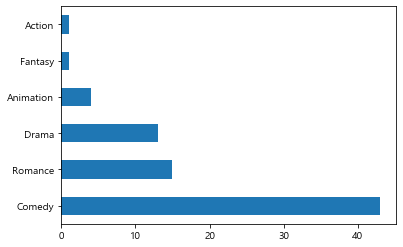

In [105]:
df['Genre'].value_counts().plot.barh()  # bar, barh, pie

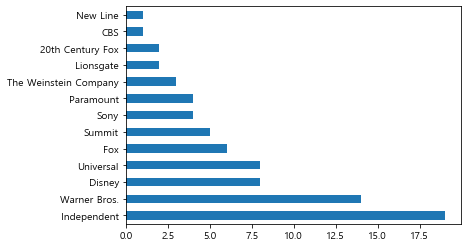

In [106]:
df['Lead Studio'].value_counts().plot.barh()

## 평점은 좋은데 망한 영화 : (평점 - 수익)이 큰 영화

$ 수익을 0~100 사이로 정규화해서
수익 최대값 709.82

In [107]:
df['Worldwide Gross'].max(), df['Worldwide Gross'].min()

(709.82, 0.03)

In [108]:
df['money'] = df['Worldwide Gross'] / df['Worldwide Gross'].max() * 100

In [109]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,money
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,41.94,2008,5.908540
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,19.62,2010,2.764081
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,26.66,2010,3.755882
3,When in Rome,Comedy,Disney,44,0.000000,15,43.04,2010,6.063509
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,219.37,2008,30.905018


In [110]:
movie = df.set_index('Film')
(movie['Audience score %'] - movie['money']).sort_values(ascending=False)

Film
A Dangerous Method             87.736299
My Week with Marilyn           82.836325
Across the Universe            79.862331
Beginners                      77.983996
Jane Eyre                      72.752444
                                 ...    
Sex and the City Two            8.377025
Mamma Mia!                     -9.862613
Mamma Mia!                     -9.862613
The Twilight Saga: New Moon   -22.000000
Twilight: Breaking Dawn       -30.922262
Length: 77, dtype: float64

## 제작사별로, 장르별로, 평점/수익률

In [111]:
movie.head()

,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,money
Film,,,,,,,,
Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,41.94,2008,5.908540
Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,19.62,2010,2.764081
You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,26.66,2010,3.755882
When in Rome,Comedy,Disney,44,0.000000,15,43.04,2010,6.063509
What Happens in Vegas,Comedy,Fox,72,6.267647,28,219.37,2008,30.905018


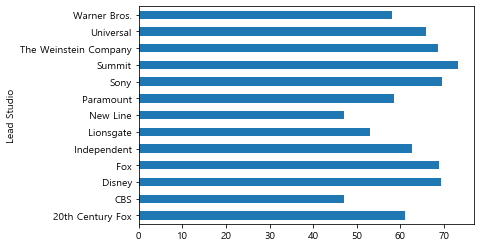

In [112]:
movie.groupby(by='Lead Studio')['Audience score %'].mean().plot.barh()

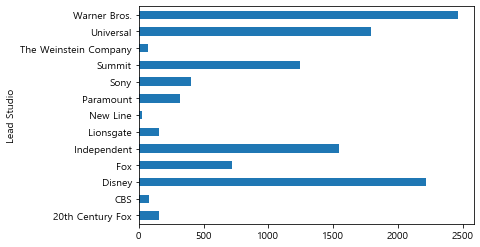

In [113]:
movie.groupby(by='Lead Studio')['Worldwide Gross'].sum().plot.barh()

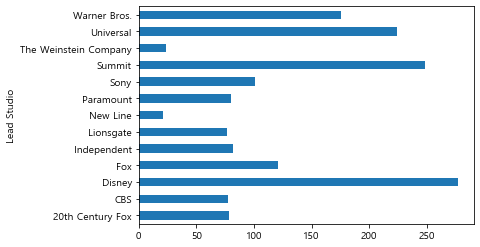

In [114]:
movie.groupby(by='Lead Studio')['Worldwide Gross'].mean().plot.barh()

In [115]:
gr = movie.groupby('Lead Studio')['Audience score %', 'Worldwide Gross'].mean()
gr

,Audience score %,Worldwide Gross
Lead Studio,,
20th Century Fox,61.000000,78.375000
CBS,47.000000,77.090000
Disney,69.375000,276.812500
Fox,69.000000,120.428333
Independent,62.684211,81.417895
Lionsgate,53.000000,76.295000
New Line,47.000000,20.710000
Paramount,58.500000,80.305000
Sony,69.500000,100.780000


In [116]:
movie.groupby(['Lead Studio', 'Genre']).mean()

Audience score %  Profitability  \
Lead Studio           Genre                                        
20th Century Fox      Drama             72.000000       3.081421   
                      Romance           50.000000       1.983200   
CBS                   Comedy            47.000000       2.202571   
Disney                Animation         70.250000       3.759414   
                      Comedy            68.500000       8.696593   
Fox                   Comedy            69.000000       4.511522   
Independent           Comedy            60.142857       2.172821   
                      Drama             66.750000      17.726703   
                      Romance           62.875000       4.045033   
Lionsgate             Action            45.000000       1.245333   
                      Comedy            61.000000       2.367685   
New Line              Comedy            47.000000       2.071000   
Paramount             Comedy            50.500000       2.284972   
                      Drama             66.500000       2.903028   
Sony                  Comedy            64.000000       3.000899   
                      Drama             66.000000       4.598800   
                      Romance           84.000000       8.744706   
Summit                Comedy            68.000000       2.011067   
                      Drama             74.000000       8.843825   
                      Romance           82.000000      10.180027   
The Weinstein Company Comedy            52.000000       1.090000   
                      Drama             84.000000       0.825800   
                      Romance           70.000000       1.747542   
Universal             Comedy            69.400000       5.892585   
                      Drama             52.000000       3.193651   
                      Romance           77.000000       0.000000   
Warner Bros.          Comedy            55.818182       3.340596   
                      Fantasy           81.000000       1.783944   
                      Romance           59.000000       3.091920   

                                 Rotten Tomatoes %  Worldwide Gross  \
Lead Studio           Genre                                           
20th Century Fox      Drama              60.000000       117.090000   
                      Romance            38.000000        39.660000   
CBS                   Comedy             20.000000        77.090000   
Disney                Animation          74.250000       316.057500   
                      Comedy             54.000000       237.567500   
Fox                   Comedy             51.833333       120.428333   
Independent           Comedy             47.428571        57.010000   
                      Drama              59.500000        17.437500   
                      Romance            36.750000       134.765000   
Lionsgate             Action             11.000000        93.400000   
                      Comedy              3.000000        59.190000   
New Line              Comedy             15.000000        20.710000   
Paramount             Comedy             43.500000        88.290000   
                      Drama              49.000000        72.320000   
Sony                  Comedy             43.000000        69.745000   
                      Drama              29.000000       114.970000   
                      Romance            93.000000       148.660000   
Summit                Comedy             46.000000        49.960000   
                      Drama              27.500000       382.840000   
                      Romance            49.000000       376.660000   
The Weinstein Company Comedy             68.000000        19.620000   
                      Drama              83.000000         8.260000   
                      Romance            64.000000        41.940000   
Universal             Comedy             54.800000       339.026000   
                      Drama              53.500000        33.380000   
       

In [117]:
movie.groupby(['Genre', 'Lead Studio']).mean()

Audience score %  Profitability  \
Genre     Lead Studio                                              
Action    Lionsgate                     45.000000       1.245333   
Animation Disney                        70.250000       3.759414   
Comedy    CBS                           47.000000       2.202571   
          Disney                        68.500000       8.696593   
          Fox                           69.000000       4.511522   
          Independent                   60.142857       2.172821   
          Lionsgate                     61.000000       2.367685   
          New Line                      47.000000       2.071000   
          Paramount                     50.500000       2.284972   
          Sony                          64.000000       3.000899   
          Summit                        68.000000       2.011067   
          The Weinstein Company         52.000000       1.090000   
          Universal                     69.400000       5.892585   
          Warner Bros.                  55.818182       3.340596   
Drama     20th Century Fox              72.000000       3.081421   
          Independent                   66.750000      17.726703   
          Paramount                     66.500000       2.903028   
          Sony                          66.000000       4.598800   
          Summit                        74.000000       8.843825   
          The Weinstein Company         84.000000       0.825800   
          Universal                     52.000000       3.193651   
Fantasy   Warner Bros.                  81.000000       1.783944   
Romance   20th Century Fox              50.000000       1.983200   
          Independent                   62.875000       4.045033   
          Sony                          84.000000       8.744706   
          Summit                        82.000000      10.180027   
          The Weinstein Company         70.000000       1.747542   
          Universal                     77.000000       0.000000   
          Warner Bros.                  59.000000       3.091920   

                                 Rotten Tomatoes %  Worldwide Gross  \
Genre     Lead Studio                                                 
Action    Lionsgate                      11.000000        93.400000   
Animation Disney                         74.250000       316.057500   
Comedy    CBS                            20.000000        77.090000   
          Disney                         54.000000       237.567500   
          Fox                            51.833333       120.428333   
          Independent                    47.428571        57.010000   
          Lionsgate                       3.000000        59.190000   
          New Line                       15.000000        20.710000   
          Paramount                      43.500000        88.290000   
          Sony                           43.000000        69.745000   
          Summit                         46.000000        49.960000   
          The Weinstein Company          68.000000        19.620000   
          Universal                      54.800000       339.026000   
          Warner Bros.                   31.545455       171.706364   
Drama     20th Century Fox               60.000000       117.090000   
          Independent                    59.500000        17.437500   
          Paramount                      49.000000        72.320000   
          Sony                           29.000000       114.970000   
          Summit                         27.500000       382.840000   
          The Weinstein Company          83.000000         8.260000   
          Universal                      53.500000        33.380000   
Fantasy   Warner Bros.                   73.000000       285.430000   
Romance   20th Century Fox               38.000000        39.660000   
          Independent                    36.750000       134.765000   
          Sony                           93.000000       148.660000   
       

In [118]:
movie.groupby(['Genre', 'Lead Studio'])['Audience score %', 'Profitability'].mean()

Audience score %  Profitability
Genre     Lead Studio                                           
Action    Lionsgate                     45.000000       1.245333
Animation Disney                        70.250000       3.759414
Comedy    CBS                           47.000000       2.202571
          Disney                        68.500000       8.696593
          Fox                           69.000000       4.511522
          Independent                   60.142857       2.172821
          Lionsgate                     61.000000       2.367685
          New Line                      47.000000       2.071000
          Paramount                     50.500000       2.284972
          Sony                          64.000000       3.000899
          Summit                        68.000000       2.011067
          The Weinstein Company         52.000000       1.090000
          Universal                     69.400000       5.892585
          Warner Bros.                  55.818182       3.340596
Drama     20th Century Fox              72.000000       3.081421
          Independent                   66.750000      17.726703
          Paramount                     66.500000       2.903028
          Sony                          66.000000       4.598800
          Summit                        74.000000       8.843825
          The Weinstein Company         84.000000       0.825800
          Universal                     52.000000       3.193651
Fantasy   Warner Bros.                  81.000000       1.783944
Romance   20th Century Fox              50.000000       1.983200
          Independent                   62.875000       4.045033
          Sony                          84.000000       8.744706
          Summit                        82.000000      10.180027
          The Weinstein Company         70.000000       1.747542
          Universal                     77.000000       0.000000
          Warner Bros.                  59.000000       3.091920

In [119]:
# 여러가지 함수 적용하기
movie.groupby('Genre').agg(['mean', 'sum'])

Audience score %       Profitability             Rotten Tomatoes %  \
                      mean   sum          mean         sum              mean   
Genre                                                                          
Action           45.000000    45      1.245333    1.245333         11.000000   
Animation        70.250000   281      3.759414   15.037656         74.250000   
Comedy           61.441860  2642      3.851160  165.599870         43.046512   
Drama            67.230769   874      8.407218  109.293839         51.538462   
Fantasy          81.000000    81      1.783944    1.783944         73.000000   
Romance          65.600000   984      4.079972   61.199579         46.266667   

                Worldwide Gross                  Year             money  \
            sum            mean      sum         mean    sum       mean   
Genre                                                                     
Action       11       93.400000    93.40  2010.000000   2010  13.158265   
Animation   297      316.057500  1264.23  2010.000000   8040  44.526429   
Comedy     1851      145.311860  6248.41  2008.837209  86380  20.471649   
Drama       670       99.011538  1287.15  2009.384615  26122  13.948823   
Fantasy      73      285.430000   285.43  2008.000000   2008  40.211603   
Romance     694      133.542000  2003.13  2009.266667  30139  18.813502   

                       
                  sum  
Genre                  
Action      13.158265  
Animation  178.105717  
Comedy     880.280916  
Drama      181.334705  
Fantasy     40.211603  
Romance    282.202530

In [120]:
movie.groupby('Genre')['Audience score %'].agg(['mean', 'min', 'max'])

,mean,min,max
Genre,,,
Action,45.000000,45,45
Animation,70.250000,52,89
Comedy,61.441860,35,83
Drama,67.230769,40,89
Fantasy,81.000000,81,81
Romance,65.600000,47,84


# Titanic Data를 통해 삶과 죽음에 대해 알아봅시다.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('titanic.csv', header=0)
df.shape, df.dtypes

((887, 8), Survived                     int64
 Pclass                       int64
 Name                        object
 Sex                         object
 Age                        float64
 Siblings/Spouses Aboard      int64
 Parents/Children Aboard      int64
 Fare                       float64
 dtype: object)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
df.isna().sum().sum()  # 누락 체크

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E5CE5C518>,
      dtype=object)

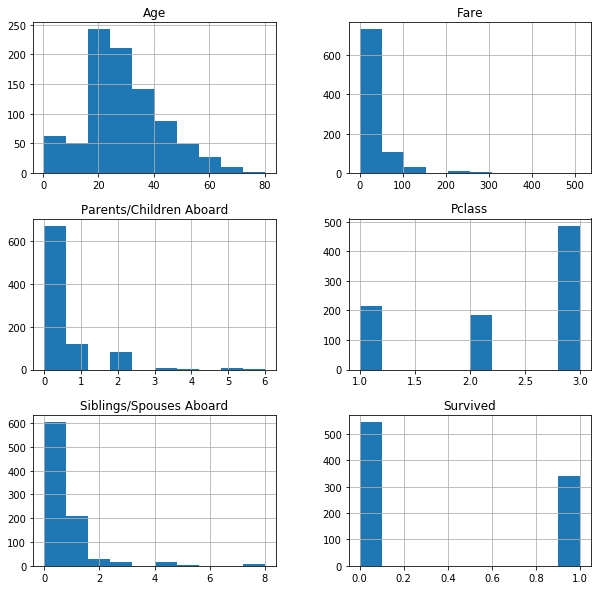

In [6]:
df.hist(figsize=(10, 10))

In [7]:
df['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [8]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.138532
1    28.408392
Name: Age, dtype: float64

In [9]:
# 나이별 생존률
df.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64

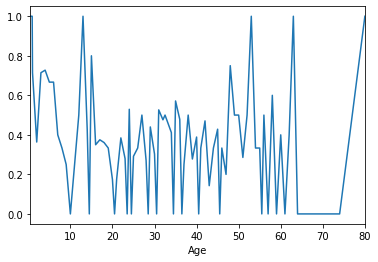

In [10]:
#df.groupby('Age')['Survived'].mean().plot.line(figsize=(10,10))
df.groupby('Age')['Survived'].mean().plot.line()  # 젊은이들의 생존률이 낮다.

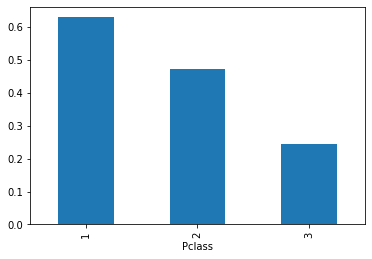

In [11]:
# 좌석 클래스별 생존률
df.groupby('Pclass')['Survived'].mean().plot.bar() # 싼 자리는 위험하다

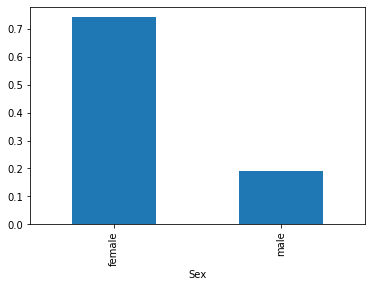

In [12]:
df.groupby('Sex')['Survived'].mean().plot.bar()  
# 여성의 생존률은 70% 이상, 남성은 20%

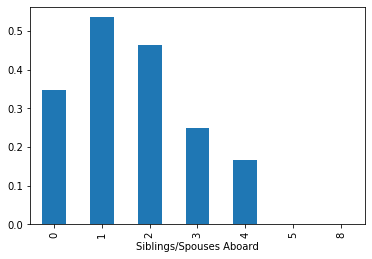

In [13]:
df.groupby('Siblings/Spouses Aboard')['Survived'].mean().plot.bar()
# 솔로는 생존률이 낮다.

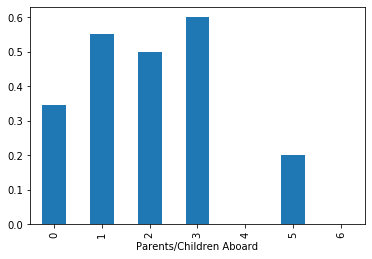

In [14]:
df.groupby('Parents/Children Aboard')['Survived'].mean().plot.bar()

In [15]:
df.columns.unique()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [16]:
df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


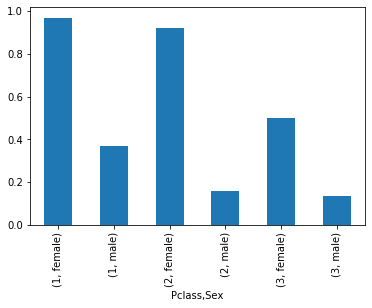

In [17]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().plot.bar()

In [18]:
titanic = df.set_index('Name')
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [19]:
titanic['Sex'][titanic['Sex']=='male'] = 0
titanic['Sex'][titanic['Sex']=='female'] = 1
titanic['Sex'] = pd.to_numeric(titanic['Sex'])

C:\Users\jfhdz\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jfhdz\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,0,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,1,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,1,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,1,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,0,35.0,0,0,8.0500


In [21]:
x = titanic.drop(columns='Survived')
y = titanic['Survived']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [39]:
model = DecisionTreeClassifier(max_depth=3).fit(x,y)
model.score(x,y)

0.8331454340473506

In [40]:
from sklearn.tree import export_graphviz
# 결정트리 모델을 파일로 저장하기
export_graphviz(model, out_file='tree.dot', class_names=['Die', 'Survived'], feature_names=x.columns, impurity=False, filled=True)

In [41]:
# graphviz-2.38 msi 설치
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

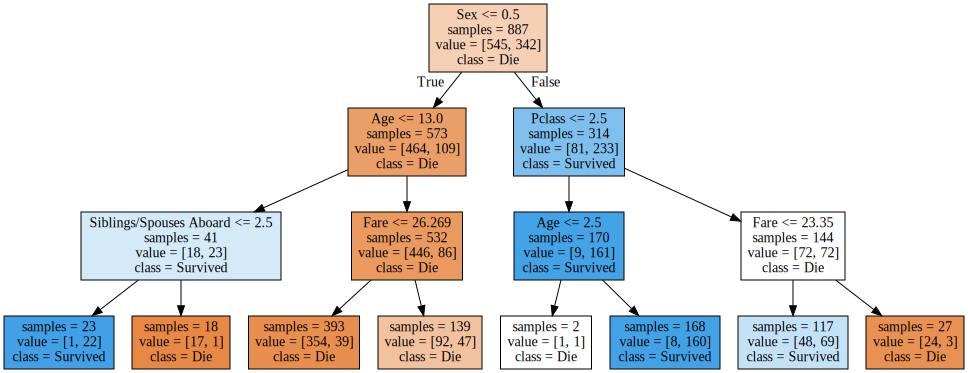

In [42]:
import graphviz  # anaconda prompt / pip install graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [43]:
import pydot
(graph,) = pydot.graph_from_dot_file('tree.dot', encoding='utf8')
graph.write_png('titanic_depth3.png')